In [7]:
import joblib
import shap
import polars as pl

import sys
from pathlib import Path
script_dir = str(Path('../scripts').resolve())

# sys.pathにスクリプトのディレクトリを追加
if script_dir not in sys.path:
    sys.path.insert(0, script_dir)

from preprocess import reduce_mem_usage, feature_engineering

In [6]:
lgbm_model = joblib.load("./models/exp_lgbm/model_2000_1.pickle")

In [8]:
test = reduce_mem_usage(pl.scan_parquet("../data/test.parquet")).collect()
test = feature_engineering(test).to_pandas()

In [11]:
X_test, y_test = test.iloc[:, 1:].sample(frac=0.01).copy(), test["Duration"].sample(frac=0.01).copy()

In [12]:
explainer = shap.TreeExplainer(
    model=lgbm_model,
    data=X_test,
)

In [13]:
shap_values = explainer(X_test)

100%|===================| 19193/19202 [15:29<00:00]        

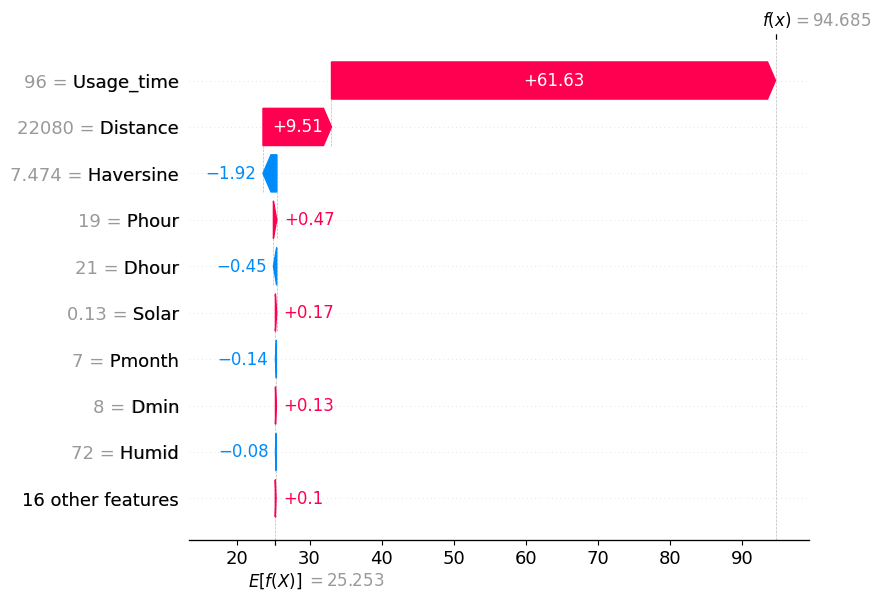

In [14]:
shap.waterfall_plot(shap_values[0])

In [17]:
shap_values[0]

.values =
array([ 9.50783341e+00,  5.30481813e-02,  3.77171921e-02, -1.89446606e-02,
       -4.83856142e-02, -1.91950998e+00, -1.37248288e-01,  8.13673838e-03,
        4.71184329e-01, -1.87857316e-02, -2.64804201e-02,  3.97713624e-02,
        1.03038981e-02, -4.47618600e-01,  1.29463586e-01, -1.09104526e-04,
        7.78085158e-02,  0.00000000e+00, -1.41708177e-02, -8.20619346e-02,
        1.72249664e-01,  4.90789663e-05, -4.63179163e-02,  4.91586803e-02,
        6.16347991e+01])

.base_values =
25.252780266279125

.data =
array([2.20800000e+04, 3.75365790e+01, 1.27092972e+02, 3.75542950e+01,
       1.27011200e+02, 7.47358395e+00, 7.00000000e+00, 1.10000000e+01,
       1.90000000e+01, 3.20000000e+01, 2.00000000e+00, 7.00000000e+00,
       1.10000000e+01, 2.10000000e+01, 8.00000000e+00, 2.00000000e+00,
       2.82000000e+01, 0.00000000e+00, 1.60000000e+00, 7.20000000e+01,
       1.30000000e-01, 0.00000000e+00, 2.66000000e+01, 2.00000000e+01,
       9.60000000e+01])

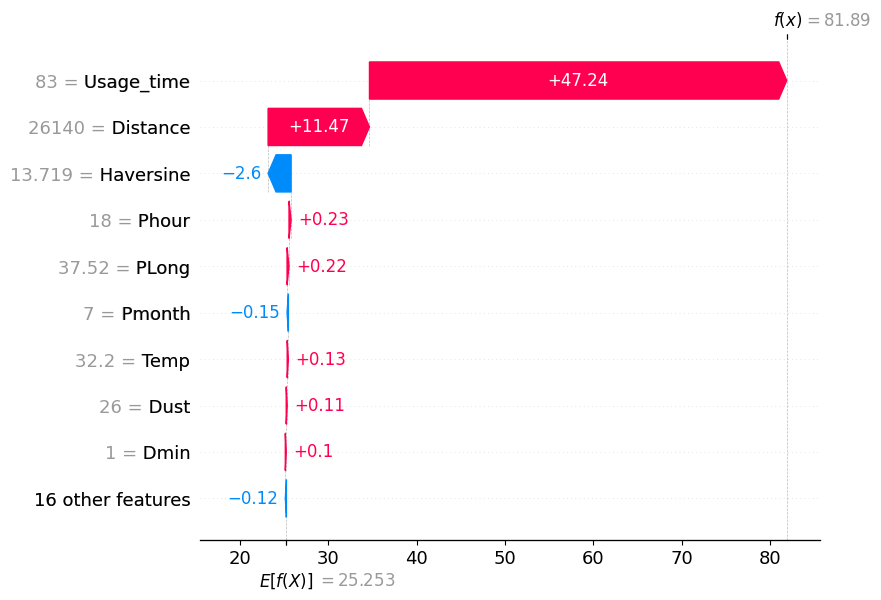

In [15]:
shap.waterfall_plot(shap_values[1])

In [18]:
shap_values[1]

.values =
array([ 1.14747033e+01,  2.20654189e-01,  7.90948305e-02,  1.15926705e-02,
        2.45509499e-02, -2.60271031e+00, -1.45953903e-01, -3.19225632e-02,
        2.33344109e-01, -5.43838168e-02, -1.41849018e-02,  2.57186586e-02,
        1.18177656e-02, -1.00313687e-01,  1.02247647e-01, -3.03828110e-03,
        1.32128323e-01,  0.00000000e+00,  3.00844607e-02, -2.29321472e-02,
        1.85064880e-02,  4.90789663e-05, -9.81738092e-02,  1.09629528e-01,
        4.72370349e+01])

.base_values =
25.252780266279125

.data =
array([2.61400000e+04, 3.75204510e+01, 1.27104202e+02, 3.75572010e+01,
       1.26955666e+02, 1.37193015e+01, 7.00000000e+00, 2.50000000e+01,
       1.80000000e+01, 3.80000000e+01, 2.00000000e+00, 7.00000000e+00,
       2.50000000e+01, 2.00000000e+01, 1.00000000e+00, 2.00000000e+00,
       3.22000000e+01, 0.00000000e+00, 2.50000000e+00, 5.80000000e+01,
       4.40000000e-01, 0.00000000e+00, 3.58000000e+01, 2.60000000e+01,
       8.30000000e+01])

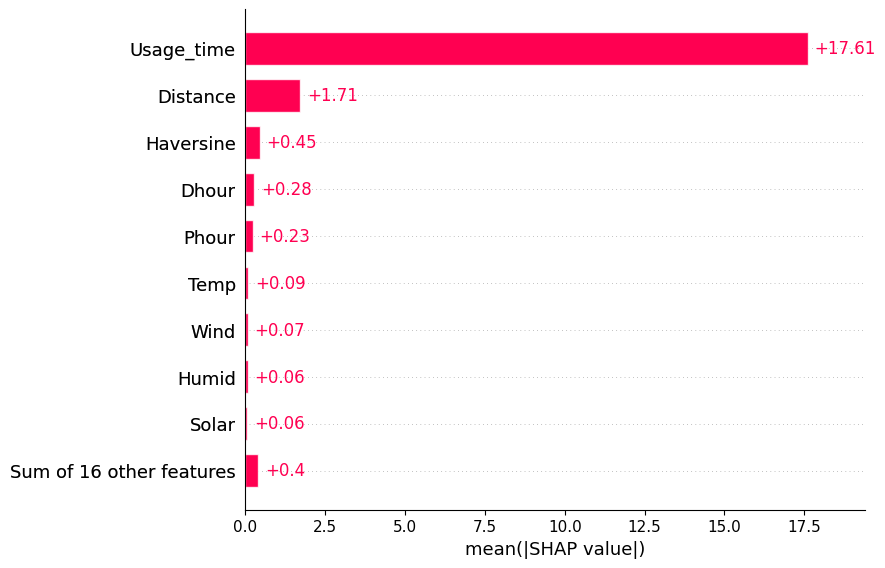

In [19]:
shap.plots.bar(shap_values=shap_values)

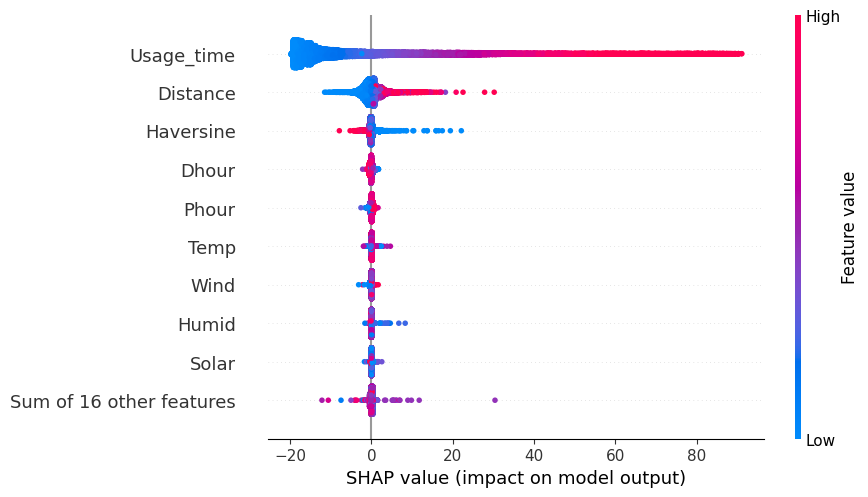

In [20]:
shap.plots.beeswarm(shap_values)

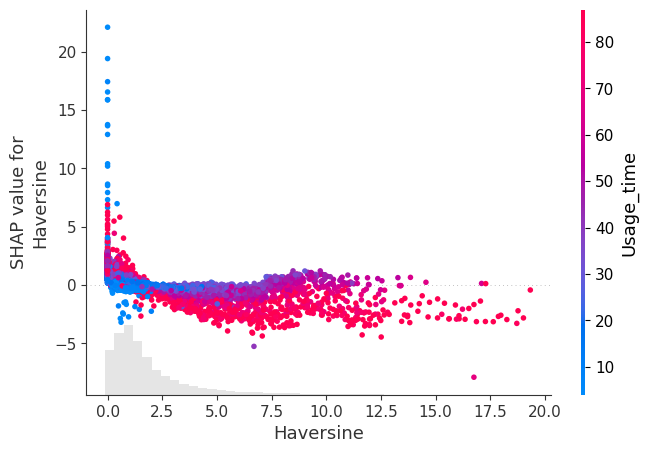

In [21]:
shap.plots.scatter(shap_values[:, "Haversine"], color=shap_values)

### Note
- Haversineが大きいと休憩時間が伸び、DurationとUsage_timeの乖離が大きくなるのが想定される
- 距離や位置情報の特徴、天候に関する特徴量をそれぞれ生成する